# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [64]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'matplotlib.pyplot' 
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 2. Collect and load data

In [7]:
df=pd.read_csv('bigcity.csv',index_col=0)
df.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


# 3. Explore numeric variables - five number summary

In [9]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

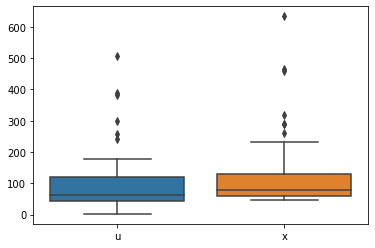

In [19]:
sns.boxplot(data=df[['u','x']])

<AxesSubplot:ylabel='Count'>

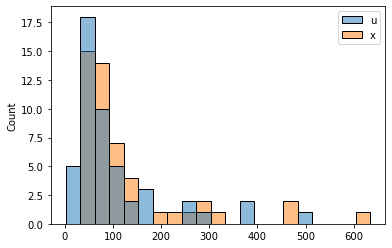

In [20]:
sns.histplot(data=df[['u','x']])

## 3b. Measure spread – variance and standard deviation

In [29]:
print(np.mean(df['u']))
print(np.mean(df['x']))
print()
print(np.std(df['u']))
print(np.std(df['x']))

103.14285714285714
127.79591836734694

103.33421110006823
121.85839550383406


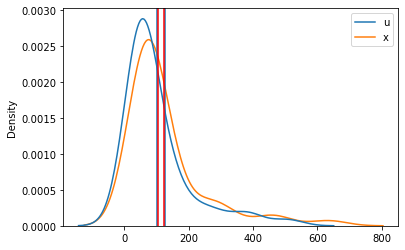

In [34]:
sns.kdeplot(data=df)
plt.axvline(df['u'].mean())
plt.axvline(df['u'].std(),color='r')

plt.axvline(df['x'].mean())
plt.axvline(df['x'].std(),color='r')

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='u', ylabel='x'>

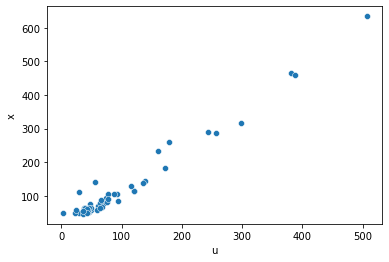

In [37]:
sns.scatterplot(df['u'],df['x'])

In [40]:
pd.crosstab(df['u'],df['x'])

x,46,48,50,52,53,54,57,58,60,61,63,64,65,67,69,75,77,79,80,85,86,89,93,104,105,106,111,113,115,130,139,142,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [43]:
df.shape

(49, 2)

In [46]:
df.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


In [51]:
x=df.iloc[:,:1]
y=df.iloc[:,1:]

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [52]:
df.isnull().sum()

u    0
x    0
dtype: int64

In [53]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


<AxesSubplot:>

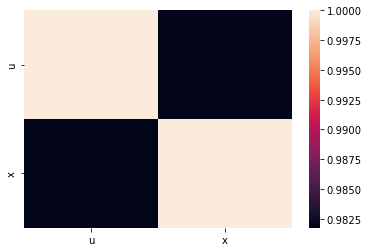

In [54]:
sns.heatmap(df.corr())

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,train_size=0.80)

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39, 1)
(39, 1)
(10, 1)
(10, 1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [67]:
import statsmodels.api as sm

In [69]:
xc=sm.add_constant(x)
ols_model=sm.OLS(y,xc).fit()
ols_model.summary()

In [72]:
ols_model.params

const   8.383956
u       1.157734
dtype: float64

In [78]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)

In [86]:
b1=lr_model.coef_
b1

array([[1.15945123]])

In [85]:
b0=lr_model.intercept_
b0

array([9.71845532])

In [95]:
y_pred=lr_model.predict(x_test)
y_pred

array([[167.40382318],
       [148.85260343],
       [ 60.73430963],
       [ 51.45869975],
       [ 80.44498061],
       [217.26022625],
       [ 56.09650469],
       [306.53797128],
       [ 59.57485839],
       [118.70687134]])

In [102]:
y_train_pred=lr_model.predict(x_train)

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

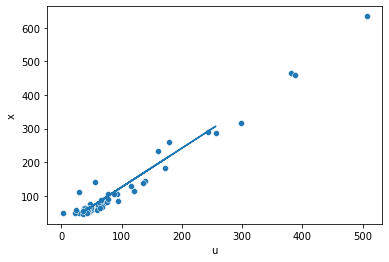

In [94]:
sns.scatterplot(df['u'],df['x'])
plt.plot(x_test,y_pred)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [96]:
from sklearn.metrics import r2_score,mean_squared_error

In [101]:
r2_test=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(r2_test)
print(rmse)

0.9181922560396981
23.385235190249123


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [105]:
r2_test=r2_score(y_test,y_pred)
mse_test=mean_squared_error(y_test,y_pred)
rmse_test=np.sqrt(mse)

r2_train=r2_score(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse)

print("test",r2_test)
print("train",r2_train)
print()
print('test',rmse_test)
print("train",rmse_train)

test 0.9181922560396981
train 0.9682175540860046

test 23.385235190249123
train 23.385235190249123
